In [1]:
# for basic operations and statistical analysis
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import levene
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# option for showing all the columns and rows if needed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# read csv files and create dataframes
# Dask library was not used as I faced several issues when I have made some test with some pandas functions
df_log_problem = pd.read_csv('Log_Problem.csv')
df_info_userdata = pd.read_csv('Info_UserData.csv')
df_info_content = pd.read_csv('Info_Content.csv')

In [5]:
# getting the shape of df_log_problem
print(df_log_problem.shape)

(16217311, 14)


In [6]:
# getting the shape of df_info_userdata
print(df_info_userdata.shape)

(72758, 12)


In [7]:
# getting the shape of df_info_content
print(df_info_content.shape)

(1330, 10)


In [8]:
# show the first five elements of the dataframe
df_log_problem.head(5)

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0


In [9]:
# show the first five elements of the dataframe
df_info_userdata.head(5)

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [10]:
# show the first five elements of the dataframe
df_info_content.head(5)

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


# Missing Value Analysis and Datasets Structure

## Examine datatypes

In [11]:
# df_log_problem datatypes
df_log_problem.dtypes

timestamp_TW                       object
uuid                               object
ucid                               object
upid                               object
problem_number                      int64
exercise_problem_repeat_session     int64
is_correct                           bool
total_sec_taken                     int64
total_attempt_cnt                   int64
used_hint_cnt                       int64
is_hint_used                         bool
is_downgrade                       object
is_upgrade                         object
level                               int64
dtype: object

In [12]:
# df_info_userdata datatypes
df_info_userdata.dtypes

uuid                    object
gender                  object
points                   int64
badges_cnt               int64
first_login_date_TW     object
user_grade               int64
user_city               object
has_teacher_cnt          int64
is_self_coach             bool
has_student_cnt          int64
belongs_to_class_cnt     int64
has_class_cnt            int64
dtype: object

In [13]:
# df_info_content datatypes
df_info_content.dtypes

ucid                   object
content_pretty_name    object
content_kind           object
difficulty             object
subject                object
learning_stage         object
level1_id              object
level2_id              object
level3_id              object
level4_id              object
dtype: object

## Separate categorical and numerical columns in the data frame

In [14]:
# df_log_problem
num_vars = df_log_problem.columns[df_log_problem.dtypes != 'object']
cat_vars = df_log_problem.columns[df_log_problem.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['problem_number', 'exercise_problem_repeat_session', 'is_correct',
       'total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used',
       'level'],
      dtype='object')
Index(['timestamp_TW', 'uuid', 'ucid', 'upid', 'is_downgrade', 'is_upgrade'], dtype='object')


In [15]:
# df_info_userdata
num_vars = df_info_userdata.columns[df_info_userdata.dtypes != 'object']
cat_vars = df_info_userdata.columns[df_info_userdata.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['points', 'badges_cnt', 'user_grade', 'has_teacher_cnt',
       'is_self_coach', 'has_student_cnt', 'belongs_to_class_cnt',
       'has_class_cnt'],
      dtype='object')
Index(['uuid', 'gender', 'first_login_date_TW', 'user_city'], dtype='object')


In [16]:
# df_info_content
num_vars = df_info_content.columns[df_info_content.dtypes != 'object']
cat_vars = df_info_content.columns[df_info_content.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index([], dtype='object')
Index(['ucid', 'content_pretty_name', 'content_kind', 'difficulty', 'subject',
       'learning_stage', 'level1_id', 'level2_id', 'level3_id', 'level4_id'],
      dtype='object')


## Find the missing values (%)

In [17]:
# df_log_problem

df_log_problem.isnull().sum().sort_values(ascending=False)/len(df_log_problem)

is_downgrade                       0.890161
is_upgrade                         0.890161
timestamp_TW                       0.000000
uuid                               0.000000
ucid                               0.000000
upid                               0.000000
problem_number                     0.000000
exercise_problem_repeat_session    0.000000
is_correct                         0.000000
total_sec_taken                    0.000000
total_attempt_cnt                  0.000000
used_hint_cnt                      0.000000
is_hint_used                       0.000000
level                              0.000000
dtype: float64

In [18]:
# df_info_userdata

df_info_userdata.isnull().sum().sort_values(ascending=False)/len(df_info_userdata)

gender                  0.547747
uuid                    0.000000
points                  0.000000
badges_cnt              0.000000
first_login_date_TW     0.000000
user_grade              0.000000
user_city               0.000000
has_teacher_cnt         0.000000
is_self_coach           0.000000
has_student_cnt         0.000000
belongs_to_class_cnt    0.000000
has_class_cnt           0.000000
dtype: float64

In [19]:
# df_info_content

df_info_content.isnull().sum().sort_values(ascending=False)/len(df_info_content)

ucid                   0.0
content_pretty_name    0.0
content_kind           0.0
difficulty             0.0
subject                0.0
learning_stage         0.0
level1_id              0.0
level2_id              0.0
level3_id              0.0
level4_id              0.0
dtype: float64

<AxesSubplot: xlabel='gender', ylabel='Count'>

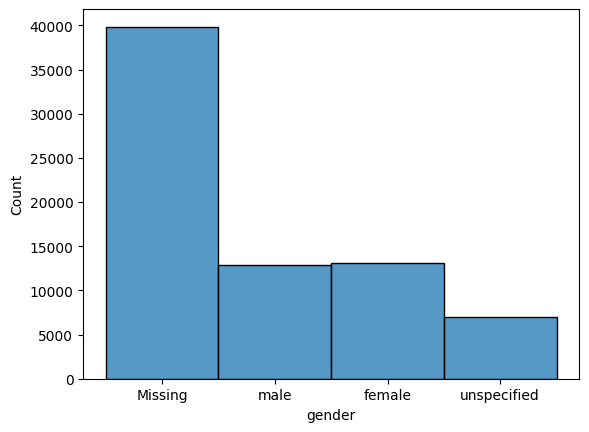

In [20]:
# histogram before removing gender from dataframe with null values
sns.histplot(data=df_info_userdata.gender.fillna('Missing'))

In [21]:
# drop gender column
df_info_userdata.drop(columns=['gender'], inplace=True)

In [22]:
# df_info_userdata after delete

df_info_userdata.isnull().sum().sort_values(ascending=False)/len(df_info_userdata)

uuid                    0.0
points                  0.0
badges_cnt              0.0
first_login_date_TW     0.0
user_grade              0.0
user_city               0.0
has_teacher_cnt         0.0
is_self_coach           0.0
has_student_cnt         0.0
belongs_to_class_cnt    0.0
has_class_cnt           0.0
dtype: float64

# Descriptive Statistics

In [23]:
# df_log_problem

df_log_problem.describe()

,problem_number,exercise_problem_repeat_session,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
count,1.621731e+07,1.621731e+07,1.621731e+07,1.621731e+07,1.621731e+07,1.621731e+07
mean,1.045406e+01,1.261218e+00,4.438166e+01,1.874895e+00,5.333163e-01,4.827990e-01
std,2.015863e+01,1.173484e+00,1.005375e+02,3.547947e+00,1.156917e+00,9.370259e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.200000e+01,1.000000e+00,4.500000e+01,1.000000e+00,0.000000e+00,1.000000e+00
max,1.702000e+03,1.190000e+02,1.800000e+03,1.000000e+03,6.500000e+01,4.000000e+00


In [24]:
# df_info_userdata

df_info_userdata.describe()

,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt
count,7.275800e+04,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000
mean,6.304759e+04,9.543789,5.620715,0.884810,0.203304,0.873306,0.046442
std,1.242042e+05,19.036328,2.041178,1.552795,6.413944,1.961188,0.315060
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.040000e+04,3.000000,6.000000,1.000000,0.000000,1.000000,0.000000
75%,6.531375e+04,10.000000,7.000000,1.000000,0.000000,1.000000,0.000000
max,4.047528e+06,760.000000,12.000000,106.000000,966.000000,120.000000,24.000000


In [25]:
# df_info_content

df_info_content.describe()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
count,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330
unique,1330,1320,1,4,1,3,1,10,42,171
top,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【一般】函數關係式,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,364ml6jwsO0pO5l86JBpC+KFYvYr7mn7S9gVuhoBnUE=
freq,1,2,1330,835,1330,784,1330,553,146,18


## Examine if we have normal distribution in our values

### for values in df_log_problem

<Figure size 600x600 with 0 Axes>

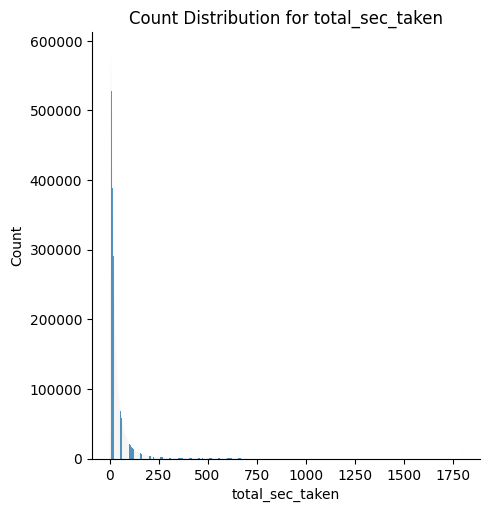

In [26]:
plt.figure(figsize=(6,6))
sns.displot(df_log_problem['total_sec_taken'])
plt.title('Count Distribution for total_sec_taken')
plt.show()

<Figure size 600x600 with 0 Axes>

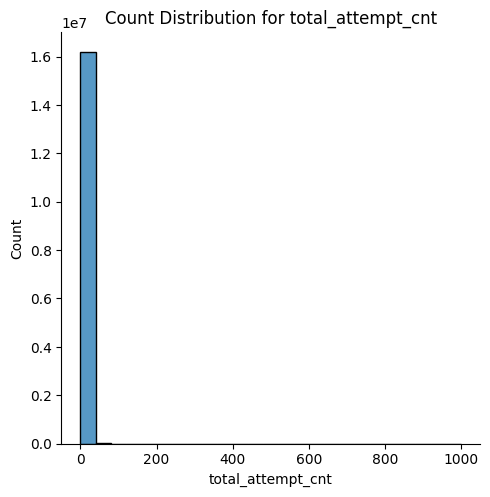

In [27]:
plt.figure(figsize=(6,6))
sns.displot(df_log_problem['total_attempt_cnt'])
plt.title('Count Distribution for total_attempt_cnt')
plt.show()

<Figure size 600x600 with 0 Axes>

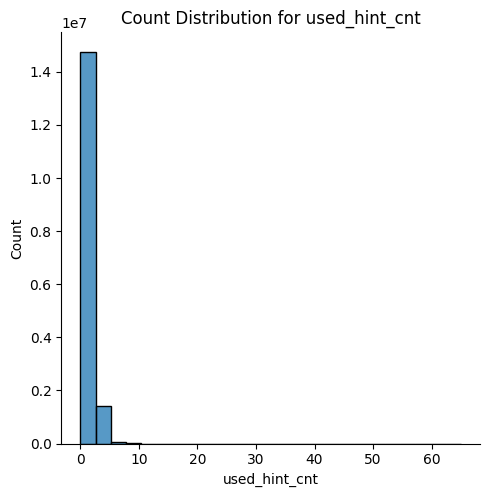

In [28]:
plt.figure(figsize=(6,6))
sns.displot(df_log_problem['used_hint_cnt'])
plt.title('Count Distribution for used_hint_cnt')
plt.show()

<Figure size 600x600 with 0 Axes>

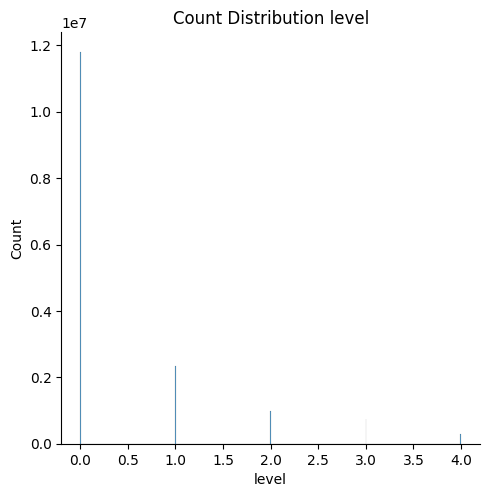

In [29]:
plt.figure(figsize=(6,6))
sns.displot(df_log_problem['level'])
plt.title('Count Distribution level')
plt.show()

### for values in df_log_problem 

<Figure size 600x600 with 0 Axes>

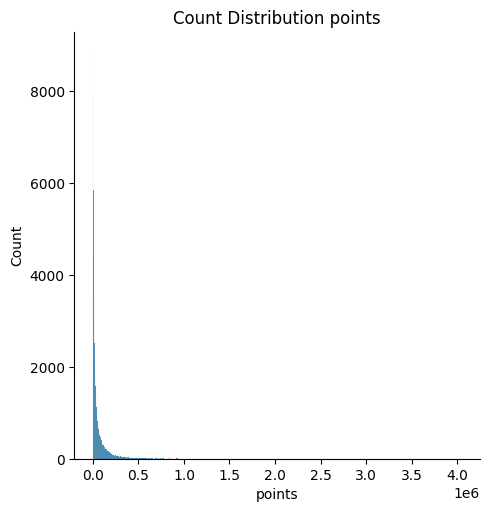

In [30]:
plt.figure(figsize=(6,6))
sns.displot(df_info_userdata['points'])
plt.title('Count Distribution points')
plt.show()

<Figure size 600x600 with 0 Axes>

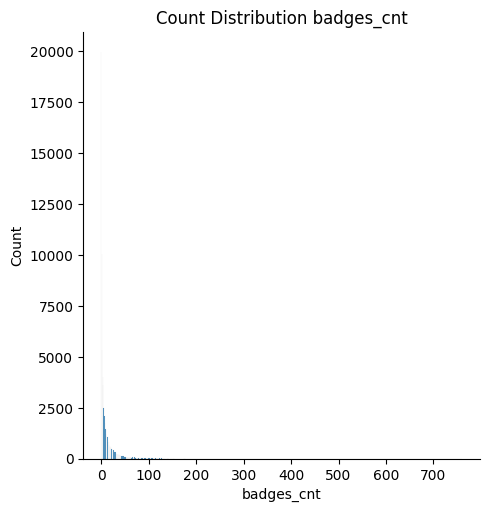

In [31]:
plt.figure(figsize=(6,6))
sns.displot(df_info_userdata['badges_cnt'])
plt.title('Count Distribution badges_cnt')
plt.show()

<Figure size 600x600 with 0 Axes>

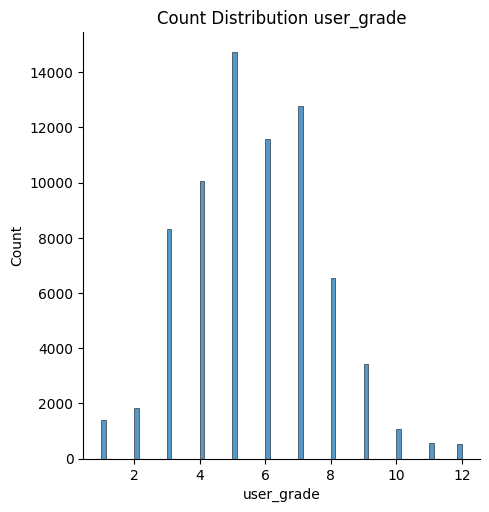

In [32]:
plt.figure(figsize=(6,6))
sns.displot(df_info_userdata['user_grade'])
plt.title('Count Distribution user_grade')
plt.show()

<Figure size 600x600 with 0 Axes>

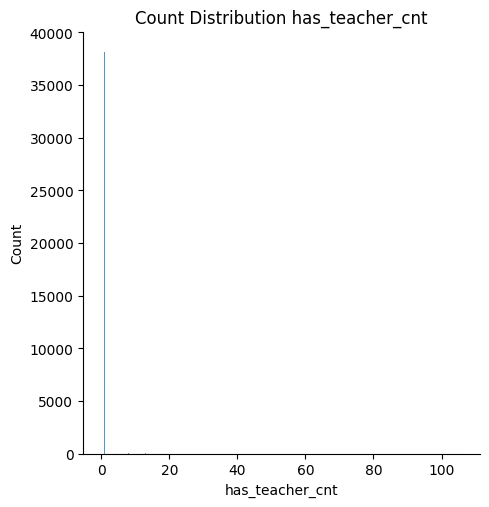

In [33]:
plt.figure(figsize=(6,6))
sns.displot(df_info_userdata['has_teacher_cnt'])
plt.title('Count Distribution has_teacher_cnt')
plt.show()

<Figure size 600x600 with 0 Axes>

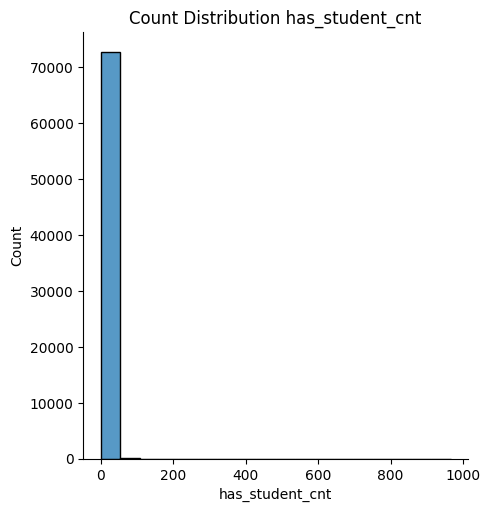

In [34]:
plt.figure(figsize=(6,6))
sns.displot(df_info_userdata['has_student_cnt'])
plt.title('Count Distribution has_student_cnt')
plt.show()

<Figure size 600x600 with 0 Axes>

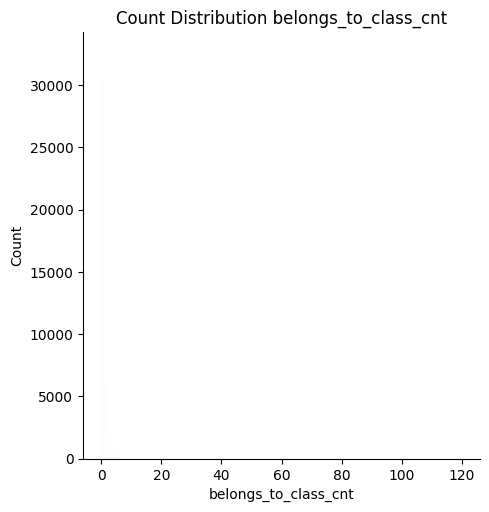

In [35]:
plt.figure(figsize=(6,6))
sns.displot(df_info_userdata['belongs_to_class_cnt'])
plt.title('Count Distribution belongs_to_class_cnt')
plt.show()

<Figure size 600x600 with 0 Axes>

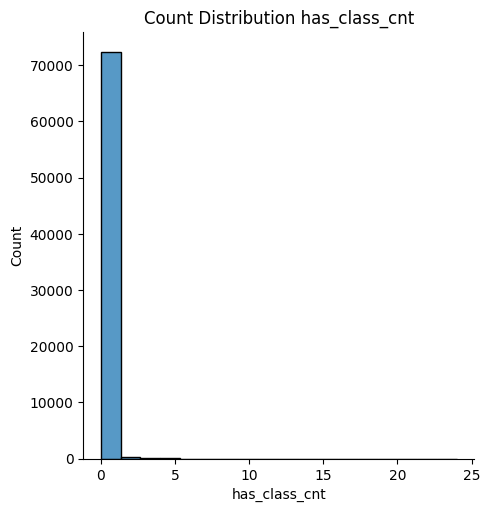

In [36]:
plt.figure(figsize=(6,6))
sns.displot(df_info_userdata['has_class_cnt'])
plt.title('Count Distribution has_class_cnt')
plt.show()

None of the values is normally distributed. We also examined it by chi square tests.

## Hypothesis Testing

In [37]:
df_log_problem['problem_number'].value_counts()

1       1650637
2       1634240
3       1584983
4       1499006
5       1423486
6       1052355
7        820108
8        717815
9        640917
10       568502
11       508835
12       418721
13       357930
14       308202
15       270049
16       238446
17       211967
18       185492
19       164170
20       146460
21       131589
22       118614
23       107312
24        96763
25        87639
26        79927
27        73031
28        66943
29        61443
30        56326
31        51951
32        47897
33        44366
34        41152
35        38303
36        35529
37        33035
38        30851
39        28865
40        27098
41        25438
42        23880
43        22419
44        21029
45        19896
46        18752
47        17688
48        16742
49        15806
50        15006
51        14188
52        13481
53        12778
54        12097
55        11494
56        10881
57        10366
58         9901
59         9430
60         8968
61         8609
62         8168
63      

#### Split the dataset in three chunks based on problem_number

In [38]:
df_log_problem_1=df_log_problem.loc[df_log_problem['problem_number']==280]

In [39]:
df_log_problem_1.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
203684,2019-07-20 11:00:00 UTC,lA8HHOgDLqkRs5zUShAfAuA+1I4WhyQJZCtmA7LhXfA=,lzijoqcCBafidRGCkuAcau0Fyc+z+574LY9rAn0Qnng=,wgvaQi+t/1W+NC88p6Axe8ZTmlP+c0CpWcICpNHAWfA=,280,17,True,5,1,0,False,NaN,NaN,3
480870,2019-07-06 09:15:00 UTC,AOiWUboG4F8jUMXURPo8smWcxYz8oyyH/4PZQZ/rdkE=,7czfGZNjJ+Rcey3EayH2GbR2/u33U9m2PKb1+lMA1bs=,A1X/5YDF1sdELNZzGT4z3SSNBbuC41f1o0E9w52gAdM=,280,17,False,5,1,3,True,NaN,NaN,2
772276,2019-04-09 17:30:00 UTC,x7oSzvgElsgvTy1eHVkSXc+FY0jgLg5Ir5bpIwsv+xo=,tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,SJaS7gPFRoEVp5ner/FFP919R5bljp0B8fe7I9gSnMg=,280,12,True,5,1,0,False,NaN,NaN,4
1626107,2019-06-30 20:45:00 UTC,AOiWUboG4F8jUMXURPo8smWcxYz8oyyH/4PZQZ/rdkE=,VkDMjjCaJsUcJWn56ZVLtKz6ohgWVycmo0nh3ieP7Oo=,LEoLjEZ9Bkv2YNbHNaB2WjaS4qIwV3gHFOm0dv1UtMw=,280,15,False,14,7,3,True,True,False,1
1954288,2019-07-10 18:30:00 UTC,NDzPBdfvTs5EV5vIaLD46rSg2y+SN1VsU0QBymgOJMQ=,lFLZ4isn2Tcu3H1DyFd4lxgmyJw8//GeWJHAYAvGHfo=,OvxNb0yLSNG5LuncGE/RM6MHAqrWqBzIqD89ORUrOcQ=,280,20,False,18,8,2,True,NaN,NaN,3


In [40]:
df_log_problem_2=df_log_problem.loc[df_log_problem['problem_number']==281]

In [41]:
df_log_problem_2.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
178902,2018-12-25 15:30:00 UTC,xKdEPL0kE4SGEY5Ry0jwv+4cn4mhPZBm+QZBb2FbM3s=,arhLfqJ8pA8XhguBiyIZKbrXTISqxBnAQeYVkKBtcWQ=,LxK8Flskju+OZvfDFx+El+TwgXfyCWKeQucTqS7pJEc=,281,17,True,5,1,0,False,NaN,NaN,1
636983,2018-12-10 19:45:00 UTC,Kmf2axD1PHEpCyT25HzYmtga46dicOmx5fM0wAQbw+k=,HMhzLW9miVf0WLDDX9F7g67mAm9td0TfHSo8TeZQj5M=,ns5nSpbYgcpAYSvNC73981v9C2r42IYf6MgSPlJcAUg=,281,20,True,8,1,0,False,NaN,NaN,3
1480433,2018-09-28 22:45:00 UTC,j7bA0NmqQJpjOkMTidf8/qkBmOzgkjS1ifXWioIcrgE=,RKkxBe+3Z33I75tZfZ8EY7LtVnN5QEfE8O0y6bPFCeo=,xtb6dzI2AH6g2QxSK8x7hxoi+wJt2InkMfekwgr4GRk=,281,18,True,5,1,0,False,NaN,NaN,2
1664871,2019-01-15 15:15:00 UTC,f/WICX6McTZWkqF8qMLPppqN11blzCGzkPY8fgqlkLU=,vhz7ZImgcFLciakjMFdmn0S/He85wqQkhLiYXRPpu18=,r8rNm6nYooR3i5JV9i/+1fLassUeviZMZh+heZ8jNnw=,281,21,False,33,2,0,False,NaN,NaN,0
1894768,2018-10-08 17:00:00 UTC,F6i28bsofigtNZEIQjedWxde7iMG/iYlfy4C7mhpqC4=,lvobiTtwUsd1ylmrciW7NzJnmmcqFC1J9PmoZ6R8xK0=,4ohCOVu1Zzmpvi7i/Ng819XzLxchvmWusNVGCvbw26Q=,281,12,False,23,4,2,True,NaN,NaN,0


In [42]:
df_log_problem_3=df_log_problem.loc[df_log_problem['problem_number']==282]

In [43]:
df_log_problem_3.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
204349,2019-07-10 18:30:00 UTC,NDzPBdfvTs5EV5vIaLD46rSg2y+SN1VsU0QBymgOJMQ=,lFLZ4isn2Tcu3H1DyFd4lxgmyJw8//GeWJHAYAvGHfo=,gXrSfCj6qZBsCDlbbZMGVo0jksRQNN01lbTcLLpsqUs=,282,20,False,10,2,0,False,NaN,NaN,3
292580,2019-04-11 17:15:00 UTC,x7oSzvgElsgvTy1eHVkSXc+FY0jgLg5Ir5bpIwsv+xo=,tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,TyofZJLYTB5ITdp/jflMInJmvKDmSzy4/R52oV8bwKY=,282,15,True,3,1,0,False,NaN,NaN,4
420311,2018-12-11 11:15:00 UTC,IQkcxFWdmruM0+DYyaEoU0qQRdCfb/XicnsmIIsETCw=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,TTjEdl48Gd6odIcpPAP7glGmdhjr9wuG+g5zdrBwf+s=,282,14,True,2,1,0,False,NaN,NaN,3
454229,2018-12-04 09:45:00 UTC,OpzcKA4EWDah5J+r/k4WeJ6RPbqrr89RSTZwiMHODnY=,vhz7ZImgcFLciakjMFdmn0S/He85wqQkhLiYXRPpu18=,SVZ3jzWxvNeegHRn74mmEmr9scELbcMHLenQigSCZFA=,282,20,True,5,1,0,False,NaN,NaN,0
998055,2019-03-18 19:45:00 UTC,YbjCdkd5gTbbTrkdk852yMnX+xoD+syXr9Plr9lSveY=,OpP2FCplZ1a3UCUD9+tmw0Az+FrTdUOy8QtzWTO3BbM=,/7xYp0os6AA7I67Y6rozskezfA8Pi+3bi3s+JKTHp6M=,282,15,False,4,1,3,True,NaN,NaN,0


In [44]:
# Leneve test for the three variables we want to examine
stat, p = levene(df_log_problem_1['total_sec_taken'], df_log_problem_2['total_sec_taken'], df_log_problem_3['total_sec_taken'])

In [45]:
p

0.5473170452550501

In [46]:
# as levene value is 0 the populations do not have equal variances. This could also been seen with the check above
[np.var(x, ddof=1) for x in [df_log_problem_1['total_sec_taken'], df_log_problem_2['total_sec_taken'], df_log_problem_3['total_sec_taken']]]

[442.718775510204, 814.9534693877549, 208.8832653061225]

In [47]:
# create a dataframe for the one way ANOVA analysis (we could do this with another way than to create a new dataframe
df_log_problem_anova = df_log_problem.loc[(df_log_problem['problem_number']>279) & (df_log_problem['problem_number']<283)]

In [48]:
model_anova_1 = ols('total_sec_taken ~ C(problem_number)', data=df_log_problem_anova).fit()

In [49]:
table_anova_1 = sm.stats.anova_lm(model_anova_1)

In [50]:
table_anova_1

,df,sum_sq,mean_sq,F,PR(>F)
C(problem_number),2.0,811.373333,405.686667,0.829877,0.438136
Residual,147.0,71861.220000,488.851837,NaN,NaN


<AxesSubplot: xlabel='problem_number', ylabel='total_sec_taken'>

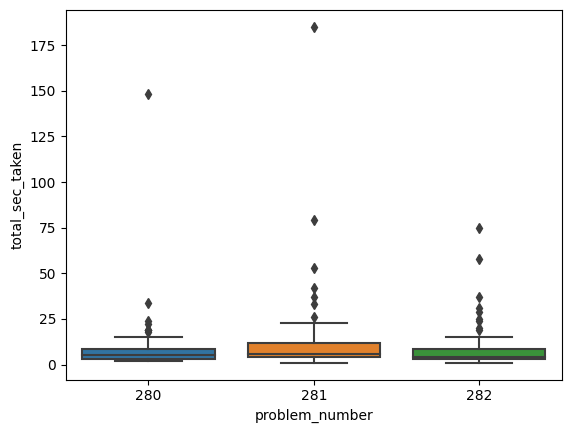

In [51]:
sns.boxplot(data=df_log_problem_anova, x='problem_number', y='total_sec_taken')

## Correlation and Multiple Linear Regression 

### Correlation 

In [52]:
corr, _ = pearsonr(df_info_userdata['points'], df_info_userdata['badges_cnt'])
print('r correlation: %.3f' % corr)

r correlation: 0.811


<AxesSubplot: xlabel='points', ylabel='badges_cnt'>

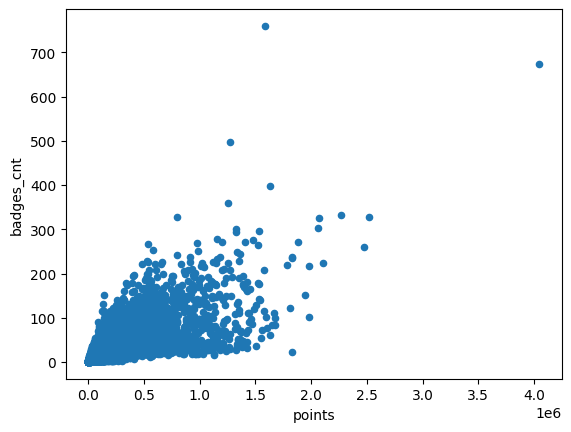

In [53]:
df_info_userdata.plot(x='points', y='badges_cnt', kind='scatter')

### Multiple Linear Regression

In [54]:
# Prepare X and y
X = df_info_userdata[['points', 'badges_cnt']].to_numpy()
X = sm.add_constant(X)
y = df_info_userdata['user_grade'].to_numpy()

In [55]:
# Create the linear model
model_mlr = sm.OLS(y, X)
results_mlr = model_mlr.fit()
print(results_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     400.1
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          1.54e-173
Time:                        16:53:45   Log-Likelihood:            -1.5476e+05
No. Observations:               72758   AIC:                         3.095e+05
Df Residuals:                   72755   BIC:                         3.095e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6148      0.009    659.105      0.0

In [56]:
# Prepare X and y
X = df_info_userdata[['points']].to_numpy()
X = sm.add_constant(X)
y = df_info_userdata['user_grade'].to_numpy()

In [57]:
# Create the linear model
model_lr = sm.OLS(y, X)
results_lr = model_lr.fit()
print(results_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     45.07
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.92e-11
Time:                        16:53:45   Log-Likelihood:            -1.5513e+05
No. Observations:               72758   AIC:                         3.103e+05
Df Residuals:                   72756   BIC:                         3.103e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6465      0.008    665.558      0.0

In [58]:
# Prepare X and y
X = df_info_userdata[['badges_cnt']].to_numpy()
X = sm.add_constant(X)
y = df_info_userdata['user_grade'].to_numpy()

In [59]:
# Create the linear model
model_lr = sm.OLS(y, X)
results_lr = model_lr.fit()
print(results_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     111.5
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           4.90e-26
Time:                        16:53:45   Log-Likelihood:            -1.5510e+05
No. Observations:               72758   AIC:                         3.102e+05
Df Residuals:                   72756   BIC:                         3.102e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5807      0.008    659.762      0.0

## Logistic Regression

In [60]:
df_info_userdata['is_self_coach'].dtype

dtype('bool')

### Initial Model

#### Examine VIF

In [61]:
X = df_info_userdata[['badges_cnt', 'points', 'user_grade']]
X['intercept'] = 1
y = df_info_userdata['is_self_coach']
# VIF dataframe
vif_df_info_userdata = pd.DataFrame()
vif_df_info_userdata['feature'] = X.columns
# calculating VIF for each feature
vif_df_info_userdata['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df_info_userdata = vif_df_info_userdata[vif_df_info_userdata['feature']!='intercept']
print(vif_df_info_userdata)

      feature       VIF
0  badges_cnt  2.949386
1      points  2.946698
2  user_grade  1.010999


C:\Users\dimpa\AppData\Local\Temp\ipykernel_7808\3638992468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


#### Logistic Regression

In [62]:
X = df_info_userdata[['badges_cnt', 'points', 'user_grade']]
y = df_info_userdata['is_self_coach']
clf_df_info_userdata = LogisticRegression()
clf_df_info_userdata.fit(X, y)

LogisticRegression()

In [63]:
X.head()

,badges_cnt,points,user_grade
0,1,18300,1
1,0,6468,1
2,0,4703,1
3,1,15525,2
4,0,7945,2


In [64]:
clf_df_info_userdata.coef_

array([[-9.60608766e-04,  1.51032331e-06, -1.01093681e+00]])

In [65]:
np.exp(clf_df_info_userdata.coef_)

array([[0.99903985, 1.00000151, 0.36387794]])

In [66]:
clf_df_info_userdata.intercept_

array([-0.17668956])

In [67]:
np.exp(clf_df_info_userdata.intercept_)

array([0.8380399])

In [68]:
score_clf_df_info_userdata = clf_df_info_userdata.score(X, y)
score_clf_df_info_userdata

0.9917809725391022

In [69]:
# Predicted probabilities
pred_df_info_userdata = clf_df_info_userdata.predict_proba(X)
data_df_info_userdata = pd.DataFrame()
data_df_info_userdata['observed'] = y
data_df_info_userdata['predicted'] = pred_df_info_userdata.tolist()
data_df_info_userdata['predicted'] = data_df_info_userdata['predicted'].apply(lambda x: x[1])

In [70]:
pred_df_info_userdata

array([[7.61504939e-01, 2.38495061e-01],
       [7.64562375e-01, 2.35437625e-01],
       [7.65041884e-01, 2.34958116e-01],
       ...,
       [9.99965700e-01, 3.42997530e-05],
       [9.99987291e-01, 1.27089061e-05],
       [9.99993194e-01, 6.80611620e-06]])

In [71]:
data_df_info_userdata.head()

,observed,predicted
0,False,0.238495
1,False,0.235438
2,False,0.234958
3,False,0.101920
4,False,0.100964


In [72]:
pred_class_df_info_userdata = clf_df_info_userdata.predict(X)
cm = confusion_matrix(y, pred_class_df_info_userdata)
print(cm)
print(f"True Negative: {100*cm[0][0]/np.sum(cm[0]):.2f}, True Positive {100*cm[1][1]/np.sum(cm[1]):.2f}")

[[72160     1]
 [  597     0]]
True Negative: 100.00, True Positive 0.00


#### Examine Likelihood

In [73]:
def hosmer_lemeshow_test(data_df_info_userdata, n_bins=10):
 sorted_df_info_userdata = data_df_info_userdata.sort_values('predicted', ascending=False)
 observed_df_info_userdata = sorted_df_info_userdata['observed']
 predicted_df_info_userdata = sorted_df_info_userdata['predicted']
 observed_df_info_userdata = np.array(observed_df_info_userdata)
 predicted_df_info_userdata = np.array(predicted_df_info_userdata)
 observed_df_info_userdata = np.array([(i.sum(), i.shape[0]) for i in np.array_split(observed_df_info_userdata, n_bins)])
 ng_df_info_userdata = np.array([i[1] for i in observed_df_info_userdata])
 observed_df_info_userdata = np.array([i[0] for i in observed_df_info_userdata])
 predicted_df_info_userdata = np.array([i.sum() for i in np.array_split(predicted_df_info_userdata, n_bins)])
 chi_square = sum((np.square(observed_df_info_userdata - predicted_df_info_userdata))/(predicted_df_info_userdata*(1-predicted_df_info_userdata/ng_df_info_userdata)))
 df = n_bins - 2
 p_value = stats.chi2.cdf(chi_square, df)
 return chi_square, p_value

In [74]:
hosmer_lemeshow_test(data_df_info_userdata)

(3539.627644672073, 1.0)

### Alternative Model

#### Examine VIF

In [75]:
X = df_info_userdata[['badges_cnt', 'points']]
X['intercept'] = 1
y = df_info_userdata['is_self_coach']
# VIF dataframe
vif_df_info_userdata = pd.DataFrame()
vif_df_info_userdata['feature'] = X.columns
# calculating VIF for each feature
vif_df_info_userdata['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df_info_userdata = vif_df_info_userdata[vif_df_info_userdata['feature']!='intercept']
print(vif_df_info_userdata)

      feature       VIF
0  badges_cnt  2.919107
1      points  2.919107


C:\Users\dimpa\AppData\Local\Temp\ipykernel_7808\884961489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


#### Logistic Regression

In [76]:
X = df_info_userdata[['badges_cnt', 'points']]
y = df_info_userdata['is_self_coach']
clf_df_info_userdata = LogisticRegression()
clf_df_info_userdata.fit(X, y)

LogisticRegression()

In [77]:
X.head()

,badges_cnt,points
0,1,18300
1,0,6468
2,0,4703
3,1,15525
4,0,7945


In [78]:
clf_df_info_userdata.coef_

array([[2.37200208e-03, 1.91010078e-06]])

In [79]:
np.exp(clf_df_info_userdata.coef_)

array([[1.00237482, 1.00000191]])

In [80]:
clf_df_info_userdata.intercept_

array([-5.00510696])

In [81]:
np.exp(clf_df_info_userdata.intercept_)

array([0.00670362])

In [82]:
score_clf_df_info_userdata = clf_df_info_userdata.score(X, y)
score_clf_df_info_userdata

0.991739739959867

In [83]:
# Predicted probabilities
pred_df_info_userdata = clf_df_info_userdata.predict_proba(X)
data_df_info_userdata = pd.DataFrame()
data_df_info_userdata['observed'] = y
data_df_info_userdata['predicted'] = pred_df_info_userdata.tolist()
data_df_info_userdata['predicted'] = data_df_info_userdata['predicted'].apply(lambda x: x[1])

In [84]:
pred_df_info_userdata

array([[0.99308951, 0.00691049],
       [0.99325879, 0.00674121],
       [0.99328133, 0.00671867],
       ...,
       [0.99324504, 0.00675496],
       [0.99308988, 0.00691012],
       [0.98739187, 0.01260813]])

In [85]:
data_df_info_userdata.head()

,observed,predicted
0,False,0.006910
1,False,0.006741
2,False,0.006719
3,False,0.006874
4,False,0.006760


In [86]:
pred_class_df_info_userdata = clf_df_info_userdata.predict(X)
cm = confusion_matrix(y, pred_class_df_info_userdata)
print(cm)
print(f"True Negative: {100*cm[0][0]/np.sum(cm[0]):.2f}, True Positive {100*cm[1][1]/np.sum(cm[1]):.2f}")

[[72157     4]
 [  597     0]]
True Negative: 99.99, True Positive 0.00


#### Examine Likelihood

In [87]:
def hosmer_lemeshow_test(data_df_info_userdata, n_bins=10):
 sorted_df_info_userdata = data_df_info_userdata.sort_values('predicted', ascending=False)
 observed_df_info_userdata = sorted_df_info_userdata['observed']
 predicted_df_info_userdata = sorted_df_info_userdata['predicted']
 observed_df_info_userdata = np.array(observed_df_info_userdata)
 predicted_df_info_userdata = np.array(predicted_df_info_userdata)
 observed_df_info_userdata = np.array([(i.sum(), i.shape[0]) for i in np.array_split(observed_df_info_userdata, n_bins)])
 ng_df_info_userdata = np.array([i[1] for i in observed_df_info_userdata])
 observed_df_info_userdata = np.array([i[0] for i in observed_df_info_userdata])
 predicted_df_info_userdata = np.array([i.sum() for i in np.array_split(predicted_df_info_userdata, n_bins)])
 chi_square = sum((np.square(observed_df_info_userdata - predicted_df_info_userdata))/(predicted_df_info_userdata*(1-predicted_df_info_userdata/ng_df_info_userdata)))
 df = n_bins - 2
 p_value = stats.chi2.cdf(chi_square, df)
 return chi_square, p_value

In [88]:
hosmer_lemeshow_test(data_df_info_userdata)

(141.4692572583011, 1.0)